In [32]:
options(warn=2, error=recover)
install_if_missing <- function(pkg, github = NULL) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    message(sprintf("Installing package: %s", pkg))
    tryCatch({
      if (is.null(github)) {
        install.packages(pkg, repos = "https://cloud.r-project.org")
      } else {
        if (!requireNamespace("remotes", quietly = TRUE)) {
          install.packages("remotes", repos = "https://cloud.r-project.org")
        }
        remotes::install_github(github)
      }
    }, error = function(e) {
      message(sprintf("Failed to install %s: %s", pkg, e$message))
      return(NULL)
    })
  }
  if (requireNamespace(pkg, quietly = TRUE)) {
    library(pkg, character.only = TRUE)
  } else {
    message(sprintf("Package %s is still not available after attempted installation.", pkg))
  }
}
pkgs <- c("lme4","readr","marginaleffects","ggplot2","dplyr","gridExtra", "patchwork", "grid")
lapply(pkgs, function(pkg){
  install_if_missing(pkg)
})
install_if_missing("showtext", github = "yixuan/showtext")
sessionInfo()

[[1]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[2]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[3]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[4]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[5]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[6]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[7]]
 [1] "showtext"        "showtextdb"      "sysfonts"        "patchwork"      
 [5] "gridExtra"       "dplyr"           "ggplot2"         "marginaleffects"
 [9] "readr"           "lme4"            "Matrix"          "stats"          
[13] "graphics"        "grDevices"       "utils"           "datasets"       
[17] "methods"         "base"           

[[8]]
 [1] "grid"            "showtext"        "showtextdb"      "sysfonts"       
 [5] "patchwork"       "gridExtra"       "dplyr"           "ggplot2"        
 [9] "marginaleffects" "readr"           "lme4"            "Matrix"         
[13] "stats"           "graphics"        "grDevices"       "utils"          
[17] "datasets"        "methods"         "base"

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20.0.0 (64-bit)
Running under: macOS 15.5

Matrix products: default
BLAS/LAPACK: /Users/zory/miniforge3/envs/py310/lib/libopenblas.0.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Los_Angeles
tzcode source: system (macOS)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] showtext_0.9-7         showtextdb_3.0         sysfonts_0.8.9        
 [4] patchwork_1.3.0        gridExtra_2.3          dplyr_1.1.4           
 [7] ggplot2_3.5.1          marginaleffects_0.25.1 readr_2.1.5           
[10] lme4_1.1-35.5          Matrix_1.6-5          

loaded via a namespace (and not attached):
 [1] generics_0.1.4    lattice_0.22-6    hms_1.1.3         digest_0.6.37    
 [5] magrittr_2.0.3    evaluate_0.22     pbdZMQ_0.3-14     fastmap_1.2.0    
 [9] jsonlite_2.0.0    backport

In [2]:
df <- read_csv("result_1743457603_20250506_20250506F.csv", na = "empty", col_select = c("Accuracy", "Group", "GroupKind", "Angle", "Proximity", "n_candidates", "Actor", "Candidates", "Stimulus_ID", "Prompt_ID", "Participant_ID", "list_id", "Run_ID", "Part"), col_types = cols(
    Accuracy = col_logical(),
    Group = col_factor(),
    GroupKind = col_factor(),
    Angle = col_factor(),
    Proximity = col_integer(),
    n_candidates = col_integer(),
    Actor = col_factor(c('X', 'Y')),
    Candidates = col_factor(),
    Stimulus_ID = col_factor(),
    Prompt_ID = col_factor(),
    Participant_ID = col_factor(),
    list_id = col_factor(),
    Run_ID = col_character(),
    Part = col_character(),
),show_col_types = TRUE)
df <- df %>% mutate(
  offset = log(1/n_candidates / (1 - 1/n_candidates))
)
colors <- c("#B83945","#C5DFF4","#7C9895","#DAA87C","#D9B9D4",
            "#C9DCC4","#377483","#F4EEAC","#E3E457","#AEB2D1",
            "#4F845C","#92A5D1")

# register DejaVuSerif
sysfonts::font_add("DejaVuSerif", regular = "./other/DejaVuSerif.ttf", bold = "./other/DejaVuSerif-Bold.ttf")
showtext::showtext_auto()

# theme
theme_serif_bold <- function(){
  theme_minimal(base_family="DejaVuSerif", base_size=14) +
    theme(
      text          = element_text(face="bold"),
      axis.title    = element_text(face="bold"),
      axis.text     = element_text(face="bold"),
      legend.text   = element_text(face="bold"),
      legend.title  = element_text(face="bold"),
      panel.grid.major = element_line(color="grey90"),
      panel.grid.minor = element_blank()
    )
}

GROUP_LIST <- c(
  "Humans",
  "glm-4v-9b",
  "gemini-1.5-pro",
  "gpt-4o",
  "Qwen2.5-VL-72B-Instruct",
  "internlm-xcomposer2-vl-7b"
)

api_to_name <- list(
  "Humans" = "Humans",
  "gemini-1.5-pro" = "Gemini",
  "gpt-4o" = "GPT",
  "Qwen2.5-VL-72B-Instruct" = "Qwen",
  "internlm-xcomposer2-vl-7b" = "InternLM",
  "glm-4v-9b" = "GLM"
)

Rows: 156825 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Run_ID, Part
int (2): Proximity, n_candidates
lgl (1): Accuracy
fct (9): Stimulus_ID, Prompt_ID, Participant_ID, Group, GroupKind, Angle, Ac...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Fitting models

In [3]:
get_formula <- function(grp){
  re <- if (grp=="Humans") {
    "(1 | Stimulus_ID) + (1 | Participant_ID)"
  } else if (grp %in% c("gemini-1.5-pro","Qwen2.5-VL-72B-Instruct")) {
    "(1 | Stimulus_ID) + (1 | Prompt_ID)"
  } else {
    "(1 | Stimulus_ID)"
  }
  as.formula(paste0(
    "Accuracy ~ Angle + scale(Proximity, scale=FALSE)",
    " + scale(n_candidates, scale=FALSE) + Actor + offset(offset) + ",
    re
  ))
}

models <- list()
for (grp in GROUP_LIST) {
  models[[grp]] <- lme4::glmer(
    get_formula(grp),
    data = df %>% filter(Group==grp, list_id!="-1", Part!="p0"),
    family = binomial(link="logit")
  )
}

## Collect Marginal Effects

In [4]:
collect_trends <- function(models, variables, type){
  bind_rows(
    lapply(names(models), function(grp){
      marginaleffects::avg_slopes(
        models[[grp]],
        variables = variables,
        type = type,
        conf_level = 0.95
      ) %>%
      mutate(Group = api_to_name[[grp]])
    }),
    .id = NULL
  )
}

In [5]:
prox_resp_trend <- collect_trends(models, "Proximity",   "response")
prox_resp_trend %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-0.06539584,0.009032724,4.490782e-13,-0.08309966,-0.047692032,Humans
-0.05459883,0.018647536,3.412183e-03,-0.09114732,-0.018050327,GLM
-0.06629573,0.017743406,1.867041e-04,-0.10107217,-0.031519296,Gemini
-0.05216329,0.015548800,7.941921e-04,-0.08263838,-0.021688199,GPT
-0.02504104,0.017379369,1.496274e-01,-0.05910398,0.009021896,Qwen
-0.04309365,0.018332476,1.873951e-02,-0.07902464,-0.007162657,InternLM


In [6]:
obj_resp_trend  <- collect_trends(models, "n_candidates","response")
obj_resp_trend %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-0.03358223,0.007187027,2.973849e-06,-0.04766854,-0.01949591,Humans
-0.10979538,0.022273938,8.251619e-07,-0.15345149,-0.06613926,GLM
-0.08319497,0.018190257,4.794130e-06,-0.11884722,-0.04754272,Gemini
-0.06600695,0.016679947,7.581308e-05,-0.09869905,-0.03331486,GPT
-0.09446443,0.018810809,5.118511e-07,-0.13133293,-0.05759592,Qwen
-0.10778648,0.020859054,2.374089e-07,-0.14866948,-0.06690349,InternLM


## Collect Marginal Means

In [7]:
collect_preds <- function(models, by, type){
  bind_rows(
    lapply(names(models), function(grp){
      marginaleffects::avg_predictions(
        models[[grp]],
        by = by,
        type = type,
        conf_level = 0.95
      ) %>%
      mutate(Group = api_to_name[[grp]])
    }),
    .id = NULL
  )
}

prox_resp <- collect_preds(models, "Proximity",   "response")
prox_link <- collect_preds(models, "Proximity",   "link")
obj_resp  <- collect_preds(models, "n_candidates","response")
obj_link  <- collect_preds(models, "n_candidates","link")
ang_resp  <- collect_preds(models, "Angle",       "response")
ang_link  <- collect_preds(models, "Angle",       "link")

In [8]:
prox_resp %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9714197,0.006395411,0.000000e+00,0.9588849,0.9839545,Humans
0.9330842,0.009024515,0.000000e+00,0.9153964,0.9507719,Humans
0.8560761,0.018235511,0.000000e+00,0.8203351,0.8918170,Humans
0.5175475,0.026640405,4.547991e-84,0.4653333,0.5697618,GLM
0.4788947,0.015859978,2.741037e-200,0.4478097,0.5099797,GLM
0.4316501,0.022298911,1.763926e-83,0.3879451,0.4753552,GLM
0.5445751,0.023120463,1.147239e-122,0.4992599,0.5898904,Gemini
0.4853954,0.015013254,2.555590e-229,0.4559700,0.5148209,Gemini
0.4408317,0.023424241,5.230895e-79,0.3949210,0.4867424,Gemini


In [9]:
prox_resp %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9714197,0.006395411,0.000000e+00,0.9588849,0.9839545,Humans
0.9330842,0.009024515,0.000000e+00,0.9153964,0.9507719,Humans
0.8560761,0.018235511,0.000000e+00,0.8203351,0.8918170,Humans
0.5175475,0.026640405,4.547991e-84,0.4653333,0.5697618,GLM
0.4788947,0.015859978,2.741037e-200,0.4478097,0.5099797,GLM
0.4316501,0.022298911,1.763926e-83,0.3879451,0.4753552,GLM
0.5445751,0.023120463,1.147239e-122,0.4992599,0.5898904,Gemini
0.4853954,0.015013254,2.555590e-229,0.4559700,0.5148209,Gemini
0.4408317,0.023424241,5.230895e-79,0.3949210,0.4867424,Gemini


In [10]:
obj_resp %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9621340,0.007425048,0.000000e+00,0.9475811,0.9766868,Humans
0.8970811,0.012939953,0.000000e+00,0.8717192,0.9224429,Humans
0.8054188,0.023870638,1.449714e-249,0.7586332,0.8522043,Humans
0.5428281,0.022396827,9.104532e-130,0.4989311,0.5867250,GLM
0.4183242,0.016239065,2.467456e-146,0.3864962,0.4501522,GLM
0.3205219,0.022449835,3.033298e-46,0.2765211,0.3645228,GLM
0.5581318,0.018565322,1.470532e-198,0.5217444,0.5945191,Gemini
0.4540390,0.016607143,1.420583e-164,0.4214896,0.4865884,Gemini
0.3067289,0.031676558,3.555819e-22,0.2446440,0.3688138,Gemini


In [11]:
obj_link %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.0142575,0.3490578,8.565675e-47,4.330116784,5.69839819,Humans
3.5686793,0.2677993,1.635453e-40,3.043802267,4.09355627,Humans
2.4316317,0.2617947,1.567503e-20,1.918523479,2.94473988,Humans
0.3974185,0.2467950,1.073283e-01,-0.086290716,0.88112772,GLM
-0.8972414,0.2562542,4.628690e-04,-1.399490418,-0.39499234,GLM
-2.2383892,0.4986357,7.154901e-06,-3.215697159,-1.26108132,GLM
0.5265387,0.2000009,8.471375e-03,0.134544112,0.91853329,Gemini
-0.4577916,0.1857148,1.370036e-02,-0.821785938,-0.09379733,Gemini
-1.6168187,0.3372995,1.639612e-06,-2.277913620,-0.95572369,Gemini


In [12]:
ang_resp %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9914239,0.003163194,0.000000e+00,0.9852242,0.9976237,Humans
0.8779339,0.017116203,0.000000e+00,0.8443868,0.9114811,Humans
0.8867325,0.016534543,0.000000e+00,0.8543254,0.9191396,Humans
0.4883381,0.034074478,1.390985e-46,0.4215534,0.5551229,GLM
0.4662169,0.022270392,2.604263e-97,0.4225677,0.5098660,GLM
0.4709151,0.022482754,2.057292e-97,0.4268497,0.5149805,GLM
0.5234956,0.023051942,3.618134e-114,0.4783146,0.5686766,Gemini
0.4622600,0.025796014,8.258926e-72,0.4117008,0.5128193,Gemini
0.4817138,0.026874877,7.617986e-72,0.4290400,0.5343876,Gemini


In [13]:
ang_link %>% select(estimate, std.error, p.value, conf.low, conf.high, Group)

estimate,std.error,p.value,conf.low,conf.high,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6.39386501,0.4949488,3.551962e-38,5.4237832,7.3639469,Humans
3.06970359,0.2743925,4.706997e-29,2.5319041,3.6075031,Humans
3.17600545,0.2784778,3.953372e-30,2.6301989,3.7218120,Humans
-0.25271898,0.3344432,4.498645e-01,-0.9082157,0.4027777,GLM
-0.43195557,0.3609798,2.314548e-01,-1.1394630,0.2755519,GLM
-0.41655129,0.3623655,2.503361e-01,-1.1267746,0.2936720,GLM
0.10164533,0.2750910,7.117572e-01,-0.4375230,0.6408137,Gemini
-0.24462343,0.2718459,3.681944e-01,-0.7774316,0.2881848,Gemini
-0.10041697,0.2731963,7.131988e-01,-0.6358720,0.4350380,Gemini


## Approach 1: get marginal effects in logit probability space solely (recommended)

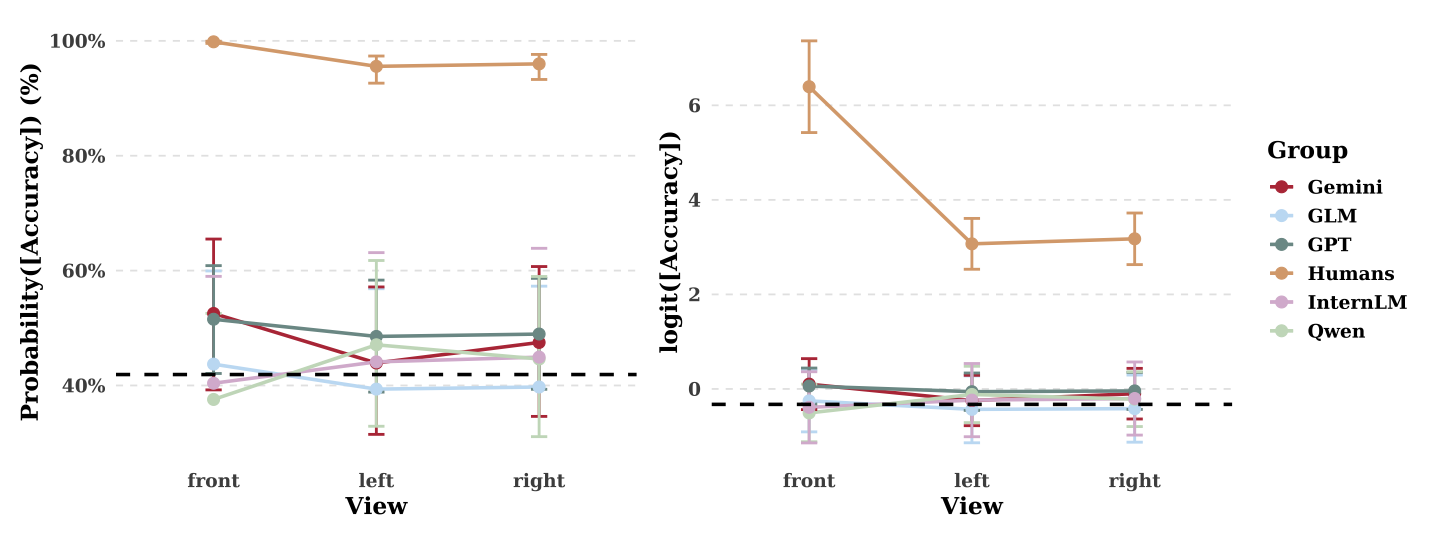

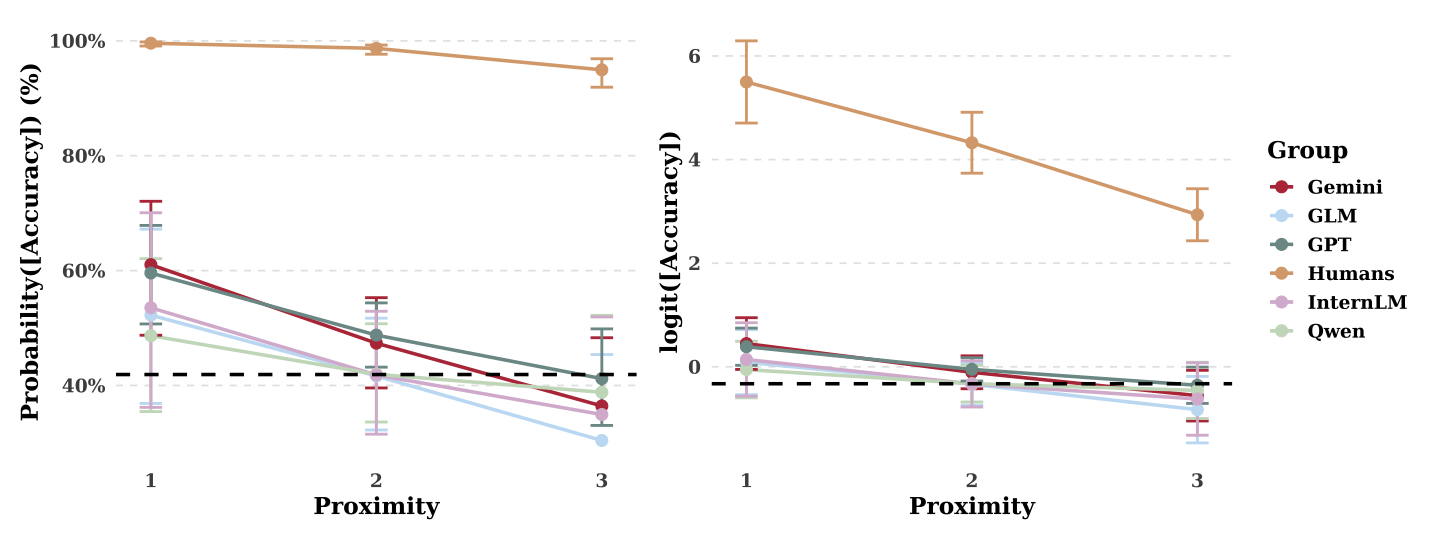

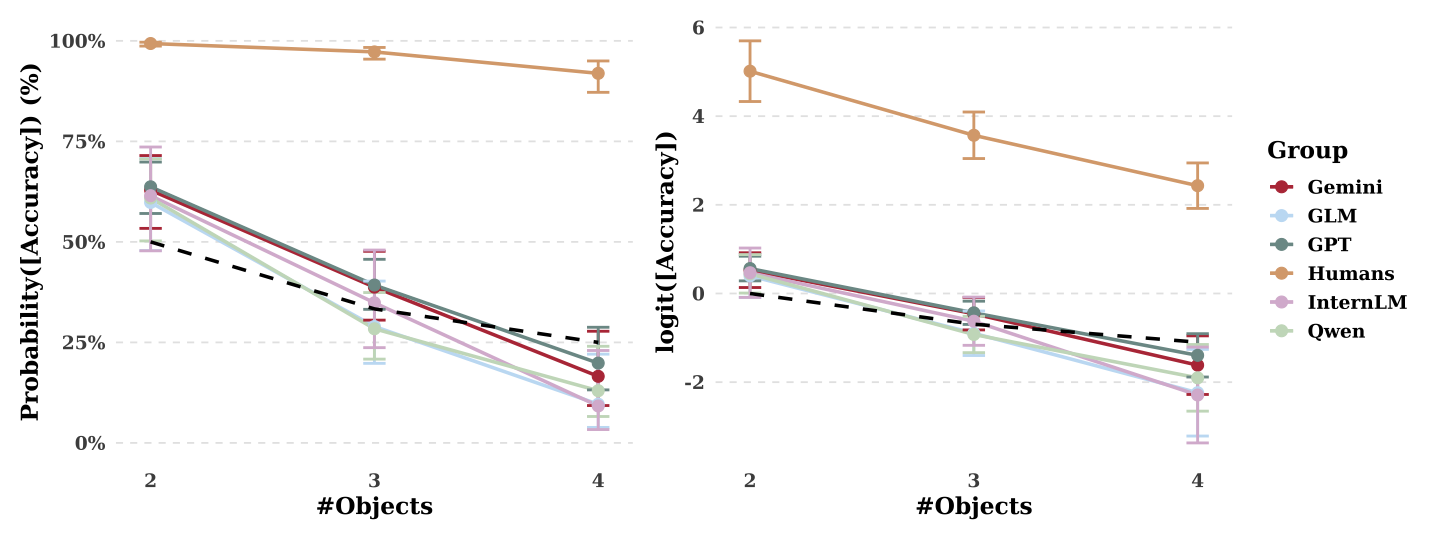

In [21]:
invlogit <- function(x) {
  1 / (1 + exp(-x))
}
plot_effect_from_link <- function(df_l, xvar, xlab, fname_base){
  # df_l contains predictions on the link scale (estimate, conf.low, conf.high)

  # Transform link scale predictions to response scale for p1
  df_r_transformed <- df_l %>%
    mutate(
      estimate_resp = invlogit(estimate),
      conf.low_resp = invlogit(conf.low),
      conf.high_resp = invlogit(conf.high)
    )

  # p1: Plot on response scale (derived from transformed link scale predictions)
  if (xvar == "n_candidates") {
    baseline_data_resp <- data.frame(
      x = c(2, 3, 4),
      y = 1 / c(2, 3, 4)
    )
    p1 <- ggplot(df_r_transformed, aes(x=.data[[xvar]], y=estimate_resp,
                                   color=Group, fill=Group, group=Group)) +
      geom_line(linewidth=1) +
      geom_errorbar(aes(ymin=conf.low_resp, ymax=conf.high_resp),
                    width=0.1, linewidth=0.8) +
      geom_point(size=3) +
      geom_line(data=baseline_data_resp, aes(x=x, y=y, group=1),
                color='black', linetype='dashed', linewidth=1,
                inherit.aes=FALSE) +
      scale_color_manual(values=colors) +
      scale_fill_manual(values=colors) +
      scale_x_continuous(breaks = unique(as.integer(df_r_transformed[[xvar]]))) +
      scale_y_continuous(limits=c(0,1.0),
                         labels = scales::percent_format(accuracy=1)) +
      labs(x = xlab, y = "Probability([Accuracy]) (%)") +
      theme_serif_bold() +
      theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
            panel.grid.major.x = element_blank(),
            legend.position = "none")
  } else {
    prob_baseline_resp <- 0.41905549430356487
    p1 <- ggplot(df_r_transformed, aes(x=.data[[xvar]], y=estimate_resp,
                                   color=Group, fill=Group, group=Group)) +
      geom_line(linewidth=1) +
      geom_errorbar(aes(ymin=conf.low_resp, ymax=conf.high_resp),
                    width=0.1, linewidth=0.8) +
      geom_point(size=3) +
      geom_hline(yintercept=prob_baseline_resp, color='black', 
                 linetype='dashed', linewidth=1) +
      scale_color_manual(values=colors) +
      scale_fill_manual(values=colors)
    if (xvar == "Proximity") { 
        p1 <- p1 + scale_x_continuous(breaks = unique(as.integer(df_r_transformed[[xvar]])))
    }
    p1 <- p1 + scale_y_continuous(limits=c(0.3,1.0),
                         labels = scales::percent_format(accuracy=1)) +
      labs(x = xlab, y = "Probability([Accuracy]) (%)") +
      theme_serif_bold() +
      theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
            panel.grid.major.x = element_blank(),
            legend.position = "none")
  }

  # p2: Plot on link scale (using original df_l)
  p2 <- ggplot(df_l, aes(x=.data[[xvar]], y=estimate,
                         color=Group, group=Group)) +
    geom_line(linewidth=1) +
    geom_errorbar(aes(ymin=conf.low, ymax=conf.high),
                  width=0.1, linewidth=0.8) +
    geom_point(size=3) +
    scale_color_manual(values=colors)
  
  if (xvar == "n_candidates") {
    logit_baseline_data <- data.frame(x = c(2, 3, 4))
    logit_baseline_data$y_logit <- log(1 / (logit_baseline_data$x - 1))
    logit_baseline_data <- logit_baseline_data[is.finite(logit_baseline_data$y_logit), ]
    p2 <- p2 + geom_line(data=logit_baseline_data, aes(x=x, y=y_logit, group=1),
                         color='black', linetype='dashed', linewidth=1,
                         inherit.aes=FALSE)
  } else { 
    prob_baseline_link <- 0.41905549430356487 
    logit_intercept <- log(prob_baseline_link / (1 - prob_baseline_link))
    p2 <- p2 + geom_hline(yintercept=logit_intercept, color='black',
                           linetype='dashed', linewidth=1)
  }

  if (xvar %in% c("Proximity", "n_candidates")) { 
      p2 <- p2 + scale_x_continuous(breaks = unique(as.integer(df_l[[xvar]])))
  }
  p2 <- p2 + labs(x = xlab, y = "logit([Accuracy])") +
    theme_serif_bold() +
    theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
          panel.grid.major.x = element_blank(),
          legend.position = "right")

  combined <- p1 + p2 +
    plot_layout(ncol = 2)

  pdf(fname_base, width=12, height=4.5)
  print(combined)
  dev.off()
  options(repr.plot.width = 12, repr.plot.height = 4.5)
  print(combined)
}

plot_effect_from_link(ang_link,  "Angle", "View", "./plots/Angle_effect.pdf")
plot_effect_from_link(prox_link, "Proximity", "Proximity", "./plots/Proximity_effect.pdf")
plot_effect_from_link(obj_link,  "n_candidates", "#Objects", "./plots/n_candidates_effect.pdf")

pdf 
  2

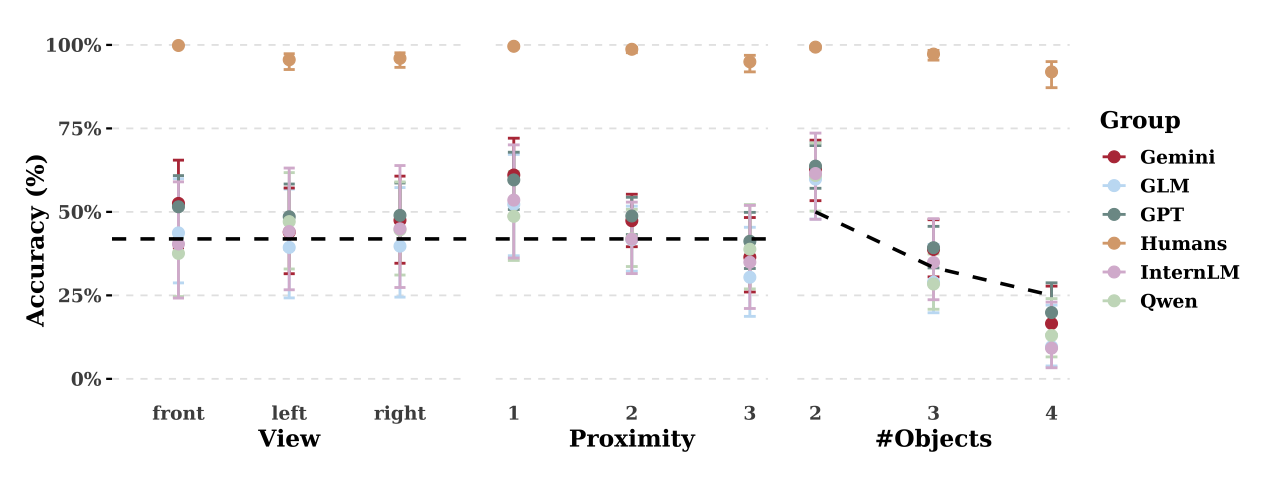

In [ ]:
plot_single_effect <- function(df_l, xvar, xlab, show_y_axis = TRUE) {
  df_r_transformed <- df_l %>%
    mutate(
      estimate_resp = invlogit(estimate),
      conf.low_resp = invlogit(conf.low),
      conf.high_resp = invlogit(conf.high)
    )

  base_plot <- ggplot(df_r_transformed, aes(x = .data[[xvar]], y = estimate_resp,
                                            color = Group, fill = Group, group = Group)) +
    geom_line(linewidth = 1) +
    geom_errorbar(aes(ymin = conf.low_resp, ymax = conf.high_resp),
                  width = 0.1, linewidth = 0.8) +
    geom_point(size = 3) +
    scale_color_manual(values = colors) +
    scale_fill_manual(values = colors) +
    scale_y_continuous(limits = c(0, 1.0),
                       labels = scales::percent_format(accuracy = 1)) +
    theme_serif_bold() +
    theme(
      panel.grid.major.y = element_line(color = "grey90", linetype = "dashed", linewidth = 0.5),
      panel.grid.major.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.y = if (show_y_axis) element_text() else element_blank(),
      axis.ticks.y = if (show_y_axis) element_line() else element_blank(),
      legend.position = "right"
    ) +
    labs(x = xlab)

  # Add baselines
  if (xvar == "n_candidates") {
    base_plot <- base_plot +
      geom_line(data = data.frame(x = c(2, 3, 4), y = 1 / c(2, 3, 4)),
                aes(x = x, y = y),
                color = 'black', linetype = 'dashed', linewidth = 1,
                inherit.aes = FALSE)
  } else if (xvar == "Proximity") {
    base_plot <- base_plot +
      geom_hline(yintercept = 0.41905549430356487, color = 'black', linetype = 'dashed', linewidth = 1)
  } else if (xvar == "Angle") {
    base_plot <- base_plot +
      geom_hline(yintercept = 0.41905549430356487, color = 'black', linetype = 'dashed', linewidth = 1)
  }

  return(base_plot)
}

# Create plots individually
p1 <- plot_single_effect(ang_link,  "Angle", "View", show_y_axis = TRUE) + 
  labs(y = "Accuracy (%)") + guides(color = "none", fill = "none")

p2 <- plot_single_effect(prox_link, "Proximity", "Proximity", show_y_axis = FALSE) +
  guides(color = "none", fill = "none") + scale_x_continuous(breaks = c(1,2,3))

p3 <- plot_single_effect(obj_link,  "n_candidates", "#Objects", show_y_axis = FALSE) + scale_x_continuous(breaks = c(2,3,4))

# Compose final plot with shared y-axis and single legend
final_plot <- p1 + p2 + p3 + 
  plot_layout(ncol = 3, widths = c(1.3, 1, 1), guides = "collect") +
  plot_annotation(
    theme = theme(
      legend.position = "right",
      legend.title = element_text(size = 13),
      legend.text = element_text(size = 10),
      plot.margin = margin(10, 10, 10, 20),
      plot.title.position = "plot",
      plot.tag = element_text(),
      plot.title = element_blank()
    )
  ) +
  patchwork::inset_element(
    ggplot() + 
      annotate("text", x = 0.5, y = 0.5, label = "Accuracy (%)", angle = 90, size = 5, family = "DejaVuSerif", fontface = "bold") +
      theme_void(),
    left = -3.1, bottom = 0.05, right = 0.02, top = 0.95, align_to = "full"
  )

# Save
pdf("./plots/effects.pdf", width = 16 * 2/3, height = 4)
print(final_plot)
dev.off()

# Also show inline if needed
options(repr.plot.width = 16 * 2/3, repr.plot.height = 4)
print(final_plot)

## Approach 2: get marginal effects separately in logit and probability space (not recommended)

In [15]:
plot_effect <- function(df_r, df_l, xvar, xlab, fname){
  # Determine baseline type
  if (xvar == "n_candidates") {
    # For n_candidates: diagonal baseline (1/x)
    baseline_data <- data.frame(
      x = c(2, 3, 4),
      y = 1 / c(2, 3, 4)
    )
    p1 <- ggplot(df_r, aes(x=.data[[xvar]], y=estimate,
                           color=Group, fill=Group, group=Group)) +
      geom_line(linewidth=1) +
      geom_errorbar(aes(ymin=conf.low, ymax=conf.high),
                    width=0.1, linewidth=0.8) +
      geom_point(size=3) +
      geom_line(data=baseline_data, aes(x=x, y=y, group=1),
                color='black', linetype='dashed', linewidth=1,
                inherit.aes=FALSE) +
      scale_color_manual(values=colors) +
      scale_fill_manual(values=colors) +
      scale_x_continuous(breaks = unique(as.integer(df_r[[xvar]]))) + # Ensure integer breaks
      scale_y_continuous(limits=c(0.2,1.0),
                         labels = scales::percent_format(accuracy=1)) +
      labs(x = xlab, y = "Probability([Accuracy]) (%)") +
      theme_serif_bold() +
      theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
            panel.grid.major.x = element_blank(),
            legend.position = "none")
  } else {
    # For Angle and Proximity: horizontal baseline
    p1 <- ggplot(df_r, aes(x=.data[[xvar]], y=estimate,
                           color=Group, fill=Group, group=Group)) +
      geom_line(linewidth=1) +
      geom_errorbar(aes(ymin=conf.low, ymax=conf.high),
                    width=0.1, linewidth=0.8) +
      geom_point(size=3) +
      geom_hline(yintercept=0.41905549430356487, color='black', 
                 linetype='dashed', linewidth=1) +
      scale_color_manual(values=colors) +
      scale_fill_manual(values=colors)
    if (xvar == "Proximity") { # Ensure integer breaks for Proximity
        p1 <- p1 + scale_x_continuous(breaks = unique(as.integer(df_r[[xvar]])))
    }
    p1 <- p1 + scale_y_continuous(limits=c(0.4,1.0),
                         labels = scales::percent_format(accuracy=1)) +
      labs(x = xlab, y = "Probability([Accuracy]) (%)") +
      theme_serif_bold() +
      theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
            panel.grid.major.x = element_blank(),
            legend.position = "none")
  }

  p2 <- ggplot(df_l, aes(x=.data[[xvar]], y=estimate,
                         color=Group, group=Group)) +
    geom_line(linewidth=1) +
    geom_errorbar(aes(ymin=conf.low, ymax=conf.high),
                  width=0.1, linewidth=0.8) +
    geom_point(size=3) +
    scale_color_manual(values=colors)
  
  # Add baseline to p2 (logit scale)
  if (xvar == "n_candidates") {
    # For n_candidates: logit baseline log(1/(x-1))
    logit_baseline_data <- data.frame(x = c(2, 3, 4)) # Match p1 baseline x-points
    logit_baseline_data$y_logit <- log(1 / (logit_baseline_data$x - 1))
    # Remove non-finite values if any x <= 1 (n_candidates should be >= 2)
    logit_baseline_data <- logit_baseline_data[is.finite(logit_baseline_data$y_logit), ]

    p2 <- p2 + geom_line(data=logit_baseline_data, aes(x=x, y=y_logit, group=1),
                         color='black', linetype='dashed', linewidth=1,
                         inherit.aes=FALSE)
  } else { # For Angle and Proximity
    prob_baseline <- 0.41905549430356487
    logit_intercept <- log(prob_baseline / (1 - prob_baseline))
    p2 <- p2 + geom_hline(yintercept=logit_intercept, color='black',
                           linetype='dashed', linewidth=1)
  }

  if (xvar %in% c("Proximity", "n_candidates")) { # Ensure integer breaks for Proximity and n_candidates
      p2 <- p2 + scale_x_continuous(breaks = unique(as.integer(df_l[[xvar]])))
  }
  p2 <- p2 + labs(x = xlab, y = "logit([Accuracy])") +
    theme_serif_bold() +
    theme(panel.grid.major.y = element_line(color="grey90", linetype="dashed", linewidth=0.5),
          panel.grid.major.x = element_blank(),
          legend.position = "right")

  # arrange side-by-side
  combined <- p1 + p2 +
    plot_layout(ncol = 2)

  # save pdf
  pdf(fname, width=12, height=4.5)
  print(combined)
  dev.off()
  # also print to screen
  options(repr.plot.width = 12, repr.plot.height = 4.5)
  print(combined)
}

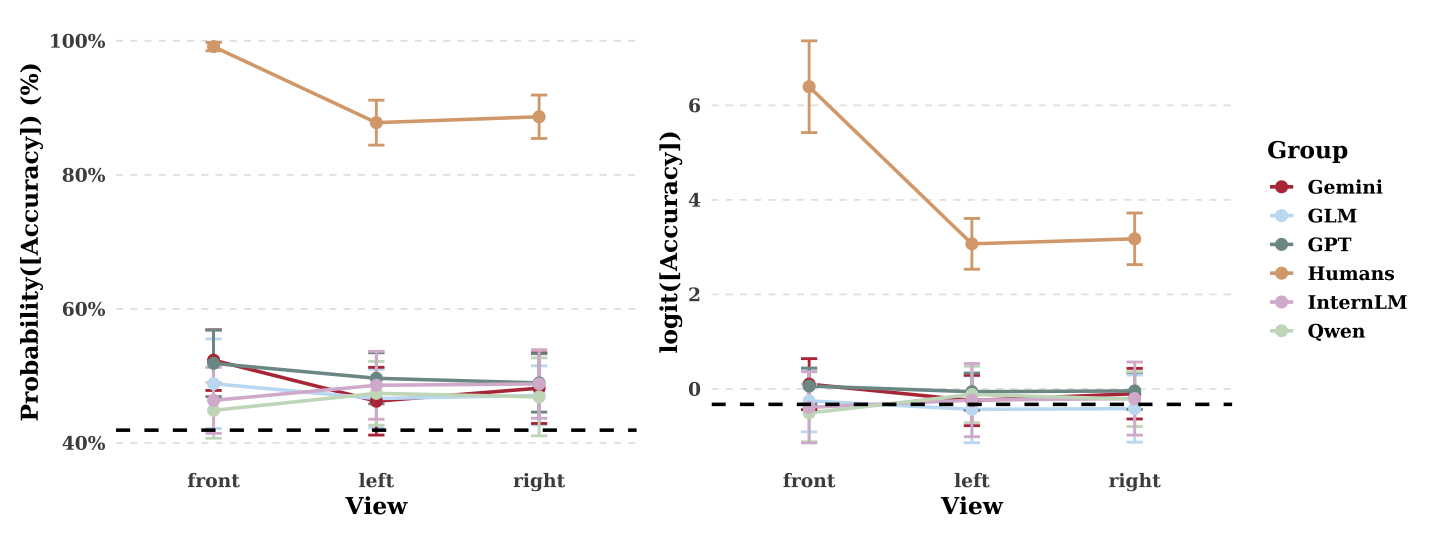

In [ ]:
plot_effect(ang_resp,  ang_link,  "Angle",        "View",           "./plots/Angle_effect2.pdf")

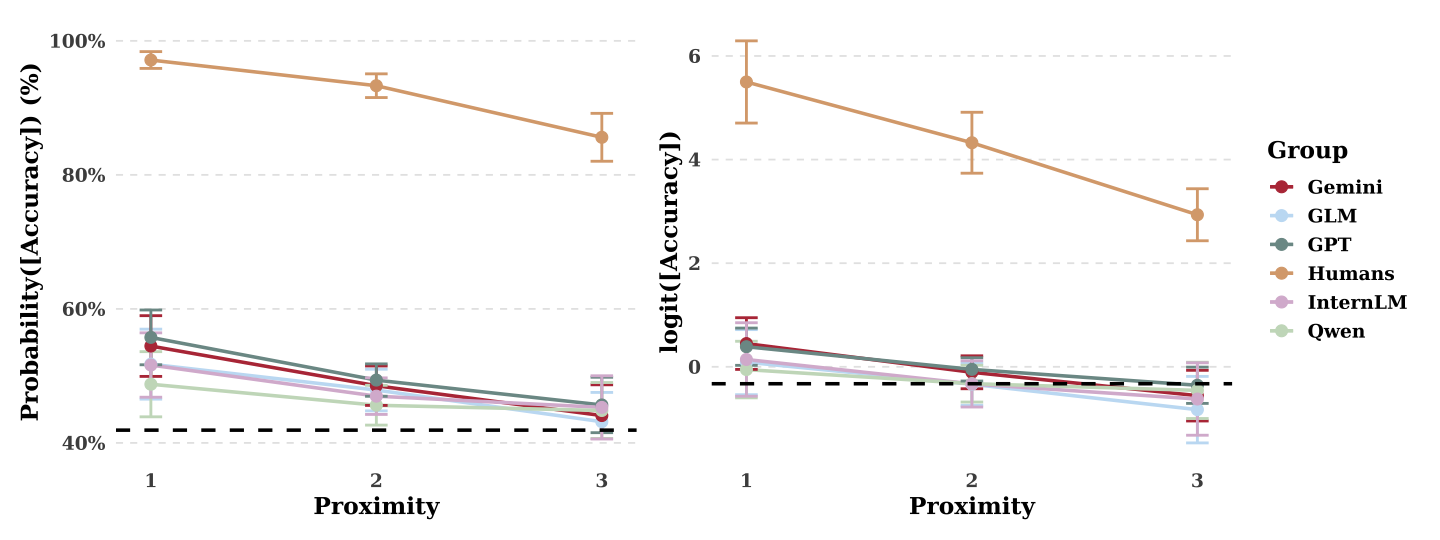

In [ ]:
plot_effect(prox_resp, prox_link, "Proximity",    "Proximity",      "./plots/Proximity_effect2.pdf")

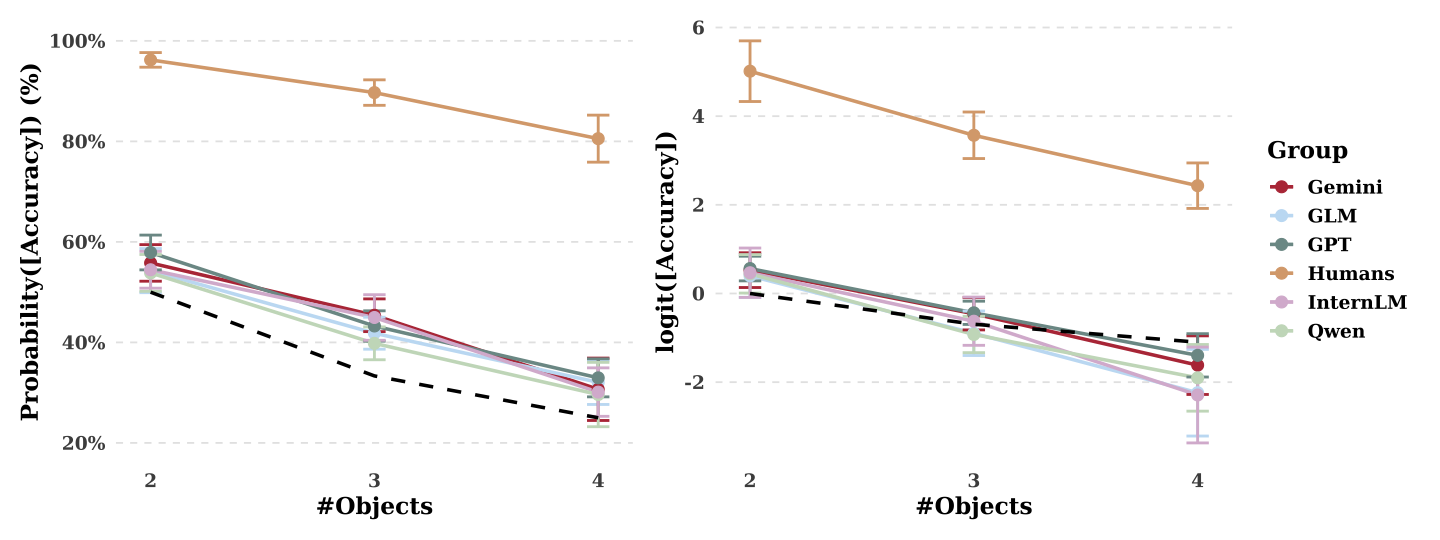

In [ ]:
plot_effect(obj_resp,  obj_link,  "n_candidates", "#Objects",       "./plots/n_candidates_effect2.pdf")